<a href="https://colab.research.google.com/github/neha-jadhavs/ENGPHYS-3NM4/blob/main/Assignments/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

Due EOD Monday Oct 20

If you wish to do the alternative (written) oral test please advise Yiru **before the morning of Monday Oct 20th**.



# Question 1

You have two circles:

$$ \begin{align}
[x -2]^2 + y^2 &= 4 \\
x^2 + [y-3]^2 &= 4
\end{align} $$

and you want to find where they cross.

a) Write out $\vec{f}({\vec{x}})$

{answer}

In [1]:
import sympy as sp

# Define the variables
x, y = sp.symbols('x y')

# Define the equations
eq1 = (x - 2)**2 + y**2 - 4
eq2 = x**2 + (y - 3)**2 - 4

# Define the function vector f(x)
f = sp.Matrix([eq1, eq2])

display(f)

Matrix([
[y**2 + (x - 2)**2 - 4],
[x**2 + (y - 3)**2 - 4]])

b) Write out the Jacobian $J(\vec{x})$

{answer}

In [2]:
# Compute the Jacobian matrix
J = f.jacobian([x, y])

display(J)

Matrix([
[2*x - 4,     2*y],
[    2*x, 2*y - 6]])

c) Write a Newton-Raphson method and use it to find where the circles cross (*Don't use a nonlinear solver package - show the algorithm down to the linear solver!*)

{implementation, answer x2}

In [3]:
import numpy as np

# Convert sympy expressions to numpy functions for numerical evaluation
f_np = sp.lambdify((x, y), f, 'numpy')
J_np = sp.lambdify((x, y), J, 'numpy')

# Newton-Raphson method implementation
def newton_raphson(f, J, x0, tol=1e-9, max_iter=100):
    """
    Solves a system of nonlinear equations using the Newton-Raphson method.

    Args:
        f: A function that takes a numpy array (x, y) and returns the function vector.
        J: A function that takes a numpy array (x, y) and returns the Jacobian matrix.
        x0: Initial guess (numpy array [x, y]).
        tol: Tolerance for convergence.
        max_iter: Maximum number of iterations.

    Returns:
        The solution (numpy array [x, y]) or None if it doesn't converge.
    """
    x_k = np.array(x0, dtype=float)
    for i in range(max_iter):
        f_k = f(x_k[0], x_k[1]).flatten()
        J_k = J(x_k[0], x_k[1])

        # Solve the linear system J_k * delta_x = -f_k
        delta_x = np.linalg.solve(J_k, -f_k)

        x_k = x_k + delta_x

        if np.linalg.norm(delta_x) < tol:
            print(f"Converged in {i+1} iterations.")
            return x_k

    print("Did not converge within the maximum number of iterations.")
    return None

# Find the first intersection point using an initial guess near one of the intersections
initial_guess_1 = [0.5, 0.5]
solution_1 = newton_raphson(f_np, J_np, initial_guess_1)

if solution_1 is not None:
    print(f"First intersection point: ({solution_1[0]:.4f}, {solution_1[1]:.4f})")

# Find the second intersection point using an initial guess near the other intersection
initial_guess_2 = [3.5, 3.5]
solution_2 = newton_raphson(f_np, J_np, initial_guess_2)

if solution_2 is not None:
    print(f"Second intersection point: ({solution_2[0]:.4f}, {solution_2[1]:.4f})")

Converged in 6 iterations.
First intersection point: (0.2794, 1.0196)
Converged in 7 iterations.
Second intersection point: (1.7206, 1.9804)


# Question 2:

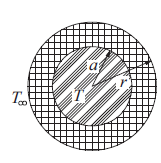

A wire carrying an electric current is surrounded by rubber insulation of outer radius $r$. The resistance of the wire generates heat, which is conducted through the insulation and convected into the surrounding air. The temperature of the wire can be shown to be:

$$ T = \frac{q}{2 \pi} \bigg[ \frac{ln(r/a)}{k} + \frac{1}{hr} \bigg] + T_\infty $$

where

- q = rate of heat generation in wire = 50 W/m
- a = radius of wire = 5mm
- k = thermal conductivity of rubber = 0.16 W/m · K
- h = convective heat-transfer coefficient = 20 W/m2 · K
- T∞ = ambient temperature = 280 K

Find $r$ that minimizes $T$

{method, imlementation, answer}


# Question 3:

{Method, answer}

Given the data in (T, k) columns,

/tmp/ipython-input-1023922433.py:116: RuntimeWarning: overflow encountered in exp
  return (A + B * T) * np.exp(-E / (R * T))


Fitted parameters:
A = -2.7388e+12
B = 8.0406e+09
E = 3.8483e+04


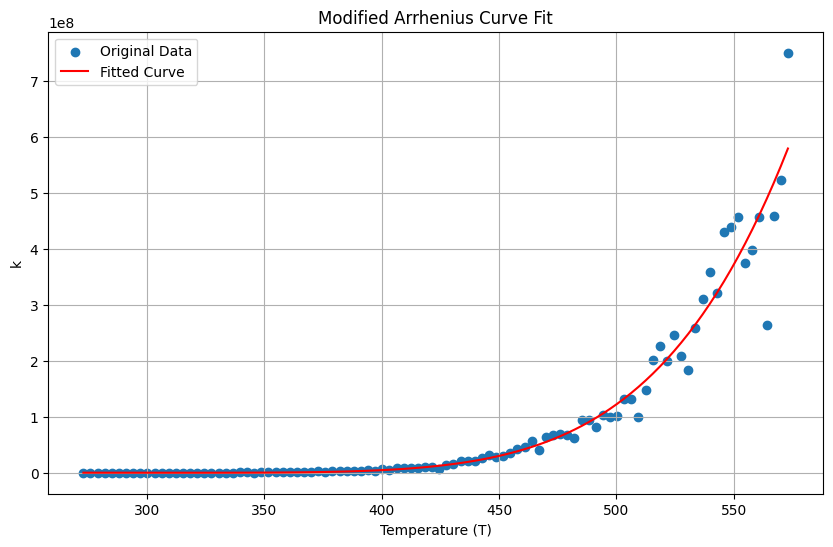

In [5]:
import numpy as np
data = np.array([[2.73000000e+02, 4.45900132e+03],
       [2.76030303e+02, 4.41776331e+03],
       [2.79060606e+02, 7.02912764e+03],
       [2.82090909e+02, 8.07233255e+03],
       [2.85121212e+02, 1.35655353e+04],
       [2.88151515e+02, 1.53935301e+04],
       [2.91181818e+02, 1.66518521e+04],
       [2.94212121e+02, 2.57056205e+04],
       [2.97242424e+02, 2.80402378e+04],
       [3.00272727e+02, 3.52850720e+04],
       [3.03303030e+02, 2.53348206e+04],
       [3.06333333e+02, 6.20422294e+04],
       [3.09363636e+02, 5.65720969e+04],
       [3.12393939e+02, 8.94469023e+04],
       [3.15424242e+02, 9.65941942e+04],
       [3.18454545e+02, 1.14139663e+05],
       [3.21484848e+02, 1.00384893e+05],
       [3.24515152e+02, 1.60315046e+05],
       [3.27545455e+02, 1.75487522e+05],
       [3.30575758e+02, 2.79200552e+05],
       [3.33606061e+02, 2.83492579e+05],
       [3.36636364e+02, 2.19343286e+05],
       [3.39666667e+02, 3.46339717e+05],
       [3.42696970e+02, 3.29907107e+05],
       [3.45727273e+02, 2.99334626e+05],
       [3.48757576e+02, 4.85091915e+05],
       [3.51787879e+02, 7.28675595e+05],
       [3.54818182e+02, 9.91612106e+05],
       [3.57848485e+02, 9.39914377e+05],
       [3.60878788e+02, 1.46925677e+06],
       [3.63909091e+02, 1.46126057e+06],
       [3.66939394e+02, 1.35738053e+06],
       [3.69969697e+02, 1.14736966e+06],
       [3.73000000e+02, 2.10254656e+06],
       [3.76030303e+02, 1.12017395e+06],
       [3.79060606e+02, 2.34226319e+06],
       [3.82090909e+02, 2.22858410e+06],
       [3.85121212e+02, 3.26613076e+06],
       [3.88151515e+02, 3.68055559e+06],
       [3.91181818e+02, 2.37869512e+06],
       [3.94212121e+02, 4.10021974e+06],
       [3.97242424e+02, 3.84314791e+06],
       [4.00272727e+02, 6.46893402e+06],
       [4.03303030e+02, 5.35422811e+06],
       [4.06333333e+02, 7.73962115e+06],
       [4.09363636e+02, 8.41409713e+06],
       [4.12393939e+02, 7.81006766e+06],
       [4.15424242e+02, 8.35579617e+06],
       [4.18454545e+02, 1.03669786e+07],
       [4.21484848e+02, 1.02992887e+07],
       [4.24515152e+02, 6.39189417e+06],
       [4.27545455e+02, 1.36405449e+07],
       [4.30575758e+02, 1.49410729e+07],
       [4.33606061e+02, 2.09149077e+07],
       [4.36636364e+02, 2.14703032e+07],
       [4.39666667e+02, 2.11464887e+07],
       [4.42696970e+02, 2.60359855e+07],
       [4.45727273e+02, 3.19593647e+07],
       [4.48757576e+02, 2.84547486e+07],
       [4.51787879e+02, 2.98421720e+07],
       [4.54818182e+02, 3.54693846e+07],
       [4.57848485e+02, 4.17941703e+07],
       [4.60878788e+02, 4.65948030e+07],
       [4.63909091e+02, 5.74740135e+07],
       [4.66939394e+02, 4.12282427e+07],
       [4.69969697e+02, 6.43295352e+07],
       [4.73000000e+02, 6.78921367e+07],
       [4.76030303e+02, 6.87155479e+07],
       [4.79060606e+02, 6.70678776e+07],
       [4.82090909e+02, 6.23342574e+07],
       [4.85121212e+02, 9.48617775e+07],
       [4.88151515e+02, 9.34710486e+07],
       [4.91181818e+02, 8.25781385e+07],
       [4.94212121e+02, 1.02888832e+08],
       [4.97242424e+02, 9.99071191e+07],
       [5.00272727e+02, 1.01319698e+08],
       [5.03303030e+02, 1.32602108e+08],
       [5.06333333e+02, 1.31923942e+08],
       [5.09363636e+02, 1.00146518e+08],
       [5.12393939e+02, 1.48398130e+08],
       [5.15424242e+02, 2.01128065e+08],
       [5.18454545e+02, 2.25792703e+08],
       [5.21484848e+02, 1.99863590e+08],
       [5.24515152e+02, 2.47074414e+08],
       [5.27545455e+02, 2.08548654e+08],
       [5.30575758e+02, 1.83449792e+08],
       [5.33606061e+02, 2.58856094e+08],
       [5.36636364e+02, 3.10038100e+08],
       [5.39666667e+02, 3.58956357e+08],
       [5.42696970e+02, 3.21512830e+08],
       [5.45727273e+02, 4.30773903e+08],
       [5.48757576e+02, 4.39179856e+08],
       [5.51787879e+02, 4.57110476e+08],
       [5.54818182e+02, 3.75292342e+08],
       [5.57848485e+02, 3.97574548e+08],
       [5.60878788e+02, 4.57516936e+08],
       [5.63909091e+02, 2.63845055e+08],
       [5.66939394e+02, 4.59249219e+08],
       [5.69969697e+02, 5.23677345e+08],
       [5.73000000e+02, 7.51098462e+08]])

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Data from the previous cell
T_data = data[:, 0]
k_data = data[:, 1]

# Ideal gas constant
R = 8.314  # J/(mol*K) or m^3*Pa/(mol*K)

# Define the modified Arrhenius curve function
def modified_arrhenius(T, A, B, E):
    return (A + B * T) * np.exp(-E / (R * T))

# Fit the curve to the data
# Provide an initial guess for the parameters [A, B, E]
# The initial guess can significantly affect the fitting process.
# Based on the form of the equation and the data scale, we can make a rough guess.
# A and B will likely be related to the scale of k, and E will influence the exponential term.
# Let's start with some reasonable positive values.
initial_guess = [1e3, 1e1, 5e4] # Example initial guess, may need adjustment

try:
    params, covariance = curve_fit(modified_arrhenius, T_data, k_data, p0=initial_guess)

    # Extract the fitted parameters
    A_fit, B_fit, E_fit = params

    print(f"Fitted parameters:")
    print(f"A = {A_fit:.4e}")
    print(f"B = {B_fit:.4e}")
    print(f"E = {E_fit:.4e}")

    # Plot the original data and the fitted curve
    plt.figure(figsize=(10, 6))
    plt.scatter(T_data, k_data, label='Original Data')
    T_fit = np.linspace(min(T_data), max(T_data), 100)
    k_fit = modified_arrhenius(T_fit, A_fit, B_fit, E_fit)
    plt.plot(T_fit, k_fit, color='red', label='Fitted Curve')
    plt.xlabel('Temperature (T)')
    plt.ylabel('k')
    plt.title('Modified Arrhenius Curve Fit')
    plt.legend()
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"Error during curve fitting: {e}")
    print("Consider adjusting the initial guess or checking the data.")


fit a modified Arrhenius curve of the form:

$$k = [A +B T]e^{\frac{-E}{RT}} $$

where $R$ is the Ideal gas constant.


